In [421]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [422]:
ins = pd.read_csv('train.csv', parse_dates = ['Date of Joining'])

In [423]:
ins = ins.dropna()
ins.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,Male,Product,Yes,2.0,4.0,3.6,0.29


In [424]:
X = ins[ins.columns[1:-1]]
y = ins['Burn Rate']
cmGender = {'Female' : 0, 'Male' : 1}
cmType = {'Service' : 0, 'Product' : 1}
cmWFH = {'No' : 0, 'Yes' : 1}
X = X.replace(['Female','Male'],[0, 1])
X = X.replace(['Service','Product'],[0, 1])
X = X.replace(['No','Yes'],[0, 1])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18590 entries, 0 to 22749
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date of Joining       18590 non-null  datetime64[ns]
 1   Gender                18590 non-null  int64         
 2   Company Type          18590 non-null  int64         
 3   WFH Setup Available   18590 non-null  int64         
 4   Designation           18590 non-null  float64       
 5   Resource Allocation   18590 non-null  float64       
 6   Mental Fatigue Score  18590 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 1.1 MB


In [425]:
from datetime import datetime

In [426]:
d0 = datetime(2009, 12, 1)
X['years'] = X['Date of Joining'].apply(lambda d: (d0-d).days/365)
X = X.drop(['Date of Joining'], axis=1)

In [427]:
X.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,years
0,0,0,0,2.0,3.0,3.8,1.169863
1,1,0,1,1.0,2.0,5.0,1.002740
3,1,0,1,1.0,1.0,2.6,1.076712
4,0,0,0,3.0,7.0,6.9,1.356164
5,1,1,1,2.0,4.0,3.6,1.013699


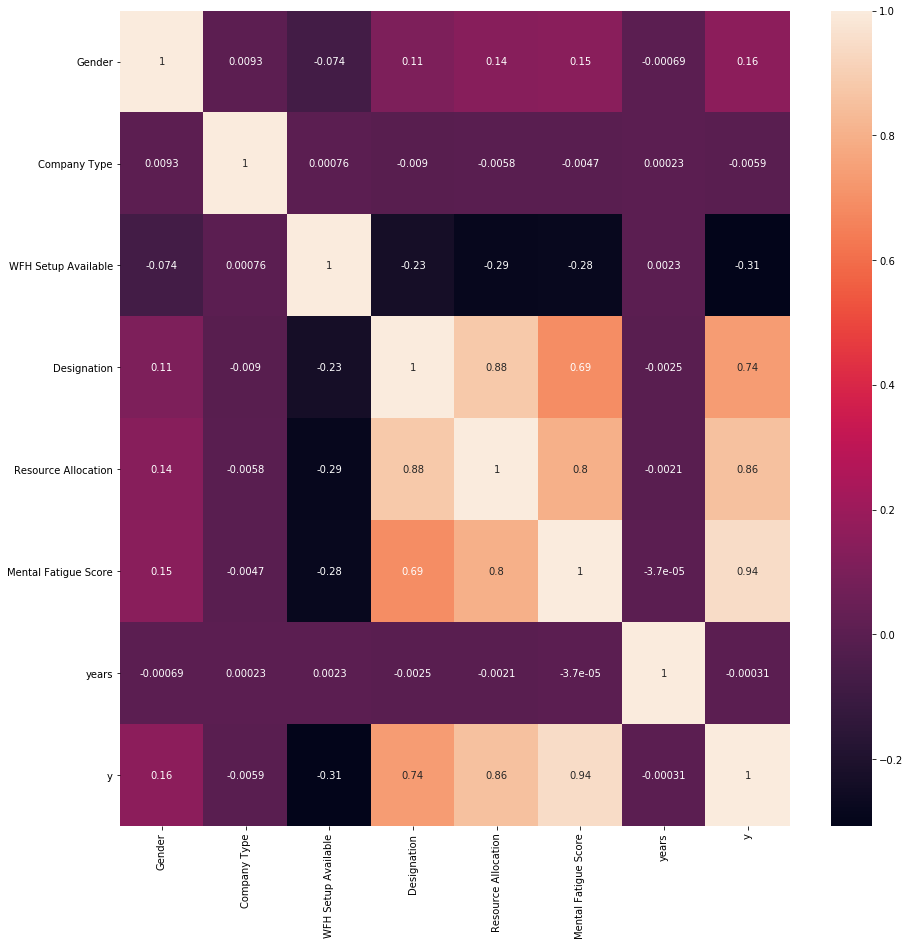

In [428]:
df = X.copy()
df['y'] = y
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True)

(array([ 707., 1182., 2467., 2848., 3622., 3631., 2247., 1078.,  549.,
         259.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

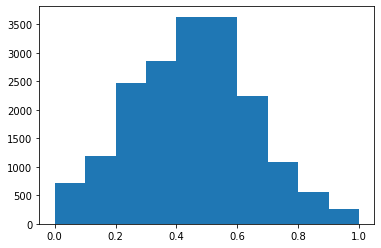

In [429]:
plt.hist(y)

(array([1808., 1821., 1936., 1916., 1880., 1786., 1844., 1824., 1890.,
        1885.]),
 array([0.91780822, 1.01780822, 1.11780822, 1.21780822, 1.31780822,
        1.41780822, 1.51780822, 1.61780822, 1.71780822, 1.81780822,
        1.91780822]),
 <a list of 10 Patch objects>)

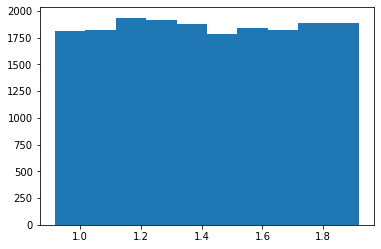

In [430]:
plt.hist(df['years'])

In [431]:
df['years'].max()

1.917808219178082

In [432]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [433]:
model = LinearRegression()

In [434]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [435]:
y_pred = model.predict(X_test)

In [436]:
len(y_pred)

3718

In [437]:
r2_score(y_test, y_pred)

0.9182146328669122

In [438]:
modelL1 = Lasso(alpha=0.000001)

In [439]:
modelL1.fit(X_train, y_train)

Lasso(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [440]:
y_predL1 = modelL1.predict(X_test)

In [441]:
r2_score(y_test, y_predL1)

0.9182146967313778

In [442]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [443]:
X_new = f_regression(X_train, y_train)

In [444]:
X_new

(array([3.91078892e+02, 1.82447205e+00, 1.50994130e+03, 1.77347779e+04,
        4.06476428e+04, 1.23770098e+05, 1.69391132e-01]),
 array([6.11145951e-086, 1.76802431e-001, 1.12969344e-314, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 6.80659427e-001]))

In [445]:
ftrs = (X_new[0] > 5).nonzero()
print(ftrs)

(array([0, 2, 3, 4, 5], dtype=int64),)


In [446]:
#ftrs = [5]

In [447]:
toTake = X_train.columns[ftrs]

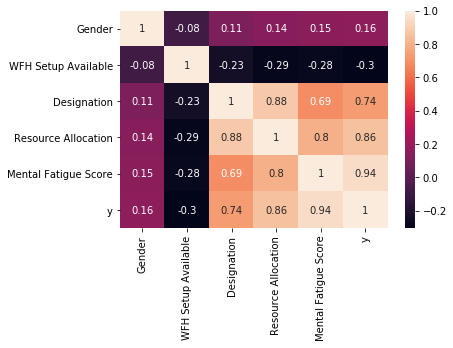

In [448]:
XX = X_train[toTake].copy()
XX['y']=y_train
sns.heatmap(XX.corr(),annot=True)

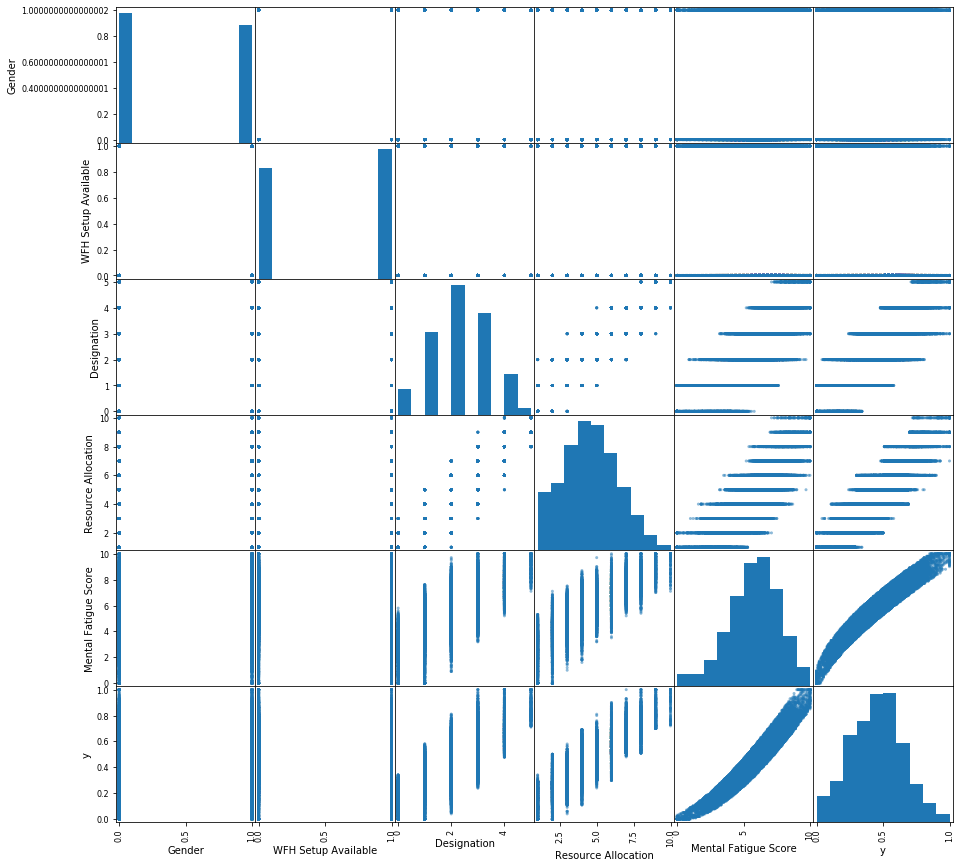

In [449]:
scatter = pd.plotting.scatter_matrix(XX, alpha=0.5, figsize = (15,15))

In [450]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [451]:
modelClass = make_pipeline(PolynomialFeatures(3), LinearRegression())
modelClass.fit(XX[toTake], XX['y'])
y_predClass = modelClass.predict(X_test[toTake])
r2_score(y_test, y_predClass)

0.9266532949327538

In [452]:
from sklearn.neighbors import KNeighborsRegressor
modelKNN = KNeighborsRegressor()
modelKNN.fit(XX[toTake], XX['y'])
y_predKnn = modelKNN.predict(X_test[toTake])
r2_score(y_test, y_predKnn)

0.9142676627289716

In [453]:
from sklearn.tree import DecisionTreeRegressor
modelT = DecisionTreeRegressor(max_depth=4).fit(XX[toTake], XX['y'])
y_predT = modelT.predict(X_test[toTake])
r2_score(y_test, y_predT)

0.8991466209130832

In [462]:
model2 = make_pipeline(PolynomialFeatures(5), LinearRegression())

In [463]:
XX2 = X_train[toTake].copy()
#XX2['MFS_LOG'] = np.sqrt(XX2['Mental Fatigue Score']) 
#XX2.drop(['Mental Fatigue Score'], axis=1, inplace=True)

In [464]:
model2.fit(XX2, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [457]:
XX2test = X_test[toTake].copy()

In [458]:
#XX2test['MFS_LOG'] = np.sqrt(XX2test['Mental Fatigue Score'])
#XX2test.drop(['Mental Fatigue Score'], axis=1, inplace=True)

In [459]:
y_pred2 = model2.predict(XX2test)

In [460]:
r2_score(y_test, y_pred2)

0.9278187883642053

In [412]:
residuals = y_test.values - y_pred2

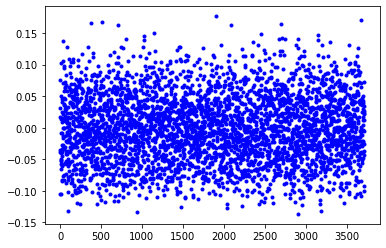

In [413]:
rp = plt.plot(residuals, "b.")

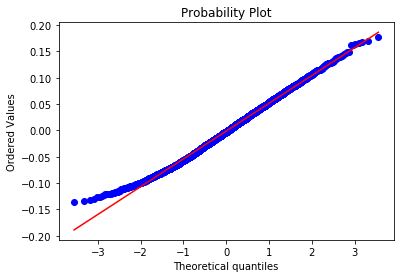

In [415]:
import scipy
residulas1dim = residuals
qq = scipy.stats.probplot(residulas1dim, dist="norm", plot=plt)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000171DA743B88>]],
      dtype=object)

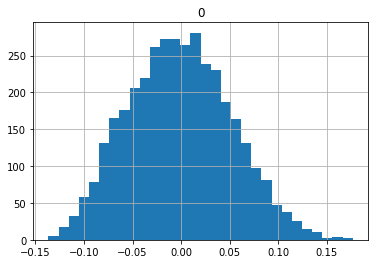

In [420]:
resdf = pd.DataFrame(residuals)
resdf.hist(bins=30)

In [401]:
tst = pd.read_csv('test.csv', parse_dates = ['Date of Joining'])

In [402]:
tst.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4
